In [2]:
import pandas as pd
# Load CSV by skipping metadata rows
df = pd.read_csv('../data/sp500.csv', skiprows=2)

df.columns = df.columns.str.strip()

print("Columns after stripping whitespace:")
print(df.columns.tolist())

df.rename(columns={
    'Price': 'Date',
    'Unnamed: 1': 'Close',
    'Unnamed: 2': 'High',
    'Unnamed: 3': 'Low',
    'Unnamed: 4': 'Open',
    'Unnamed: 5': 'Volume'
}, inplace=True)
print("Columns after stripping whitespace:")
print(df.columns.tolist())

numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Date']=pd.to_datetime(df['Date'], errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.info())
print(df.head())

Columns after stripping whitespace:
['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
Columns after stripping whitespace:
['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3902 non-null   datetime64[ns]
 1   Close   3902 non-null   float64       
 2   High    3902 non-null   float64       
 3   Low     3902 non-null   float64       
 4   Open    3902 non-null   float64       
 5   Volume  3902 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 183.0 KB
None
        Date        Close         High          Low         Open      Volume
0 2010-01-04  1132.989990  1133.869995  1116.560059  1116.560059  3991400000
1 2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000
2 2010-01-06  1137.140015  1139.1

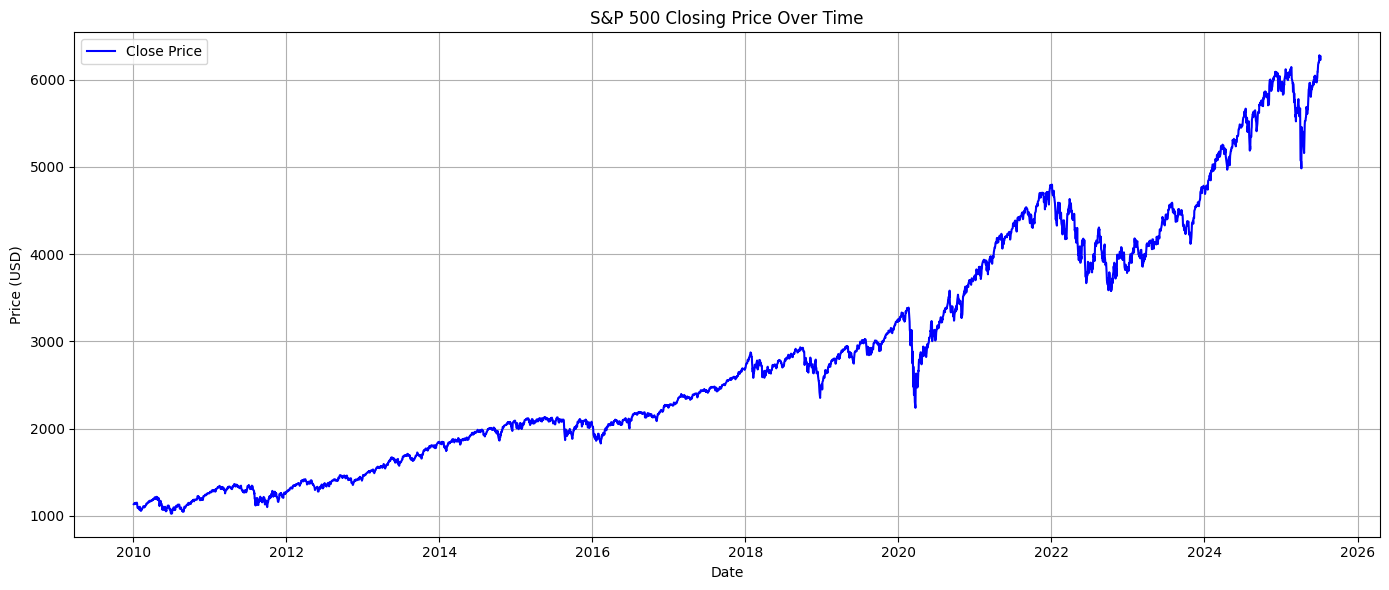

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Close'],label='Close Price', color='blue')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

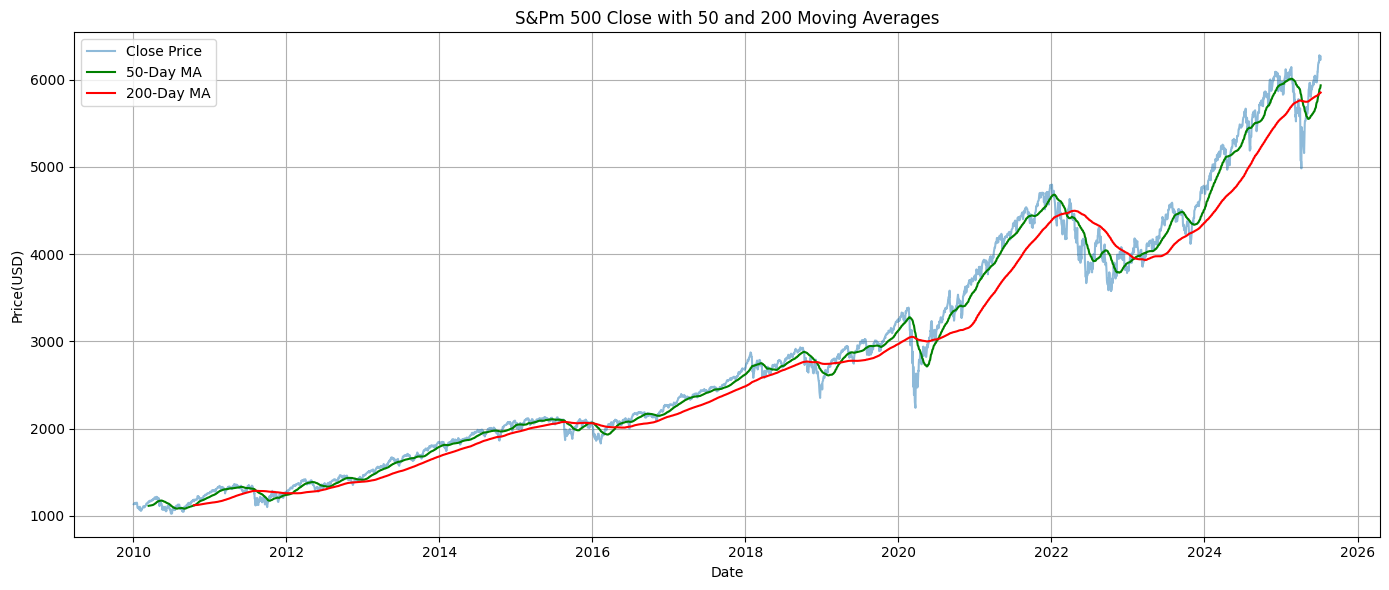

In [4]:
df["MA50"]=df['Close'].rolling(window=50).mean()
df['MA200']=df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'],df['MA50'], label="50-Day MA", color='green')
plt.plot(df['Date'],df['MA200'], label="200-Day MA", color='red')
plt.title('S&Pm 500 Close with 50 and 200 Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

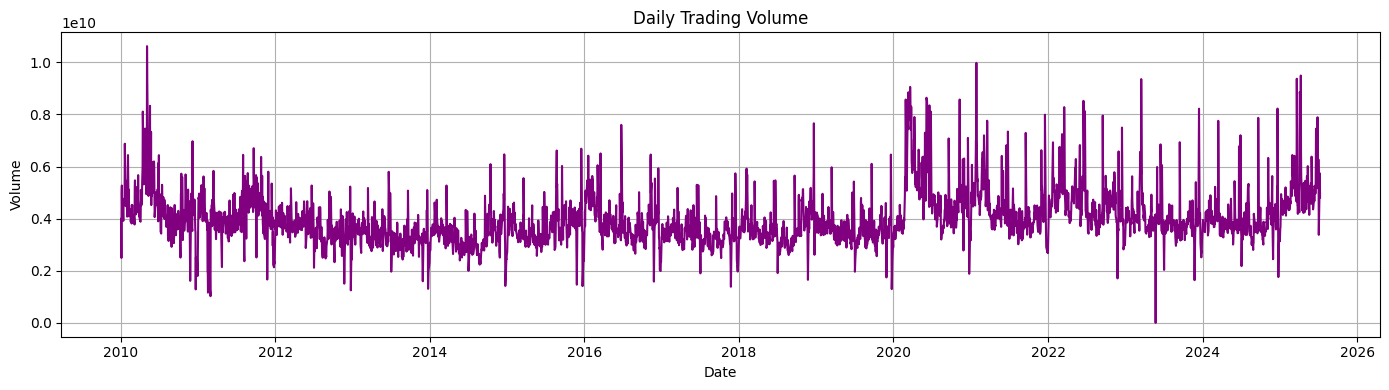

In [13]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Volume'], label='Volume', color='purple')
plt.title('Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()
